In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_VJC_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,117964,118955,115981,118955,1125320
1,2019-03-04,119451,120145,118658,119847,990660
2,2019-03-05,119550,119649,118459,118955,1074790
3,2019-03-06,118955,119946,118955,119946,939310
4,2019-03-07,119946,120541,119847,120343,1014890
...,...,...,...,...,...,...
1309,2024-05-27,108300,109400,107700,109000,638400
1310,2024-05-28,109900,109900,108500,109600,686800
1311,2024-05-29,109600,109700,107300,107900,816000
1312,2024-05-30,107000,108400,107000,107000,661900


In [3]:
#3. Partition the data into necessary segments
data_model = data[['close']]
split = int(len(data)*0.7)
train = data_model[:split]
test = data_model[split:]

In [4]:
#4. Using auto ARIMA to find the most suitable p, d, q and fit with model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=16451.881, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16448.395, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16448.898, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16448.823, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16446.434, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16448.031, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.830 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
#5. Check the p-value to see if it is statistically significant
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  919
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8222.217
Date:                Thu, 06 Jun 2024   AIC                          16446.434
Time:                        02:38:28   BIC                          16451.256
Sample:                             0   HQIC                         16448.275
                                - 919                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.521e+06   9.29e+04     37.894      0.000    3.34e+06     3.7e+06
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):               688.87
Prob(Q):                              0.12   Pr

In [6]:
#6. Predict on the test data
predictions = model.predict(n_periods=len(test)+90)
predict_test = predictions[:-90]

In [7]:
#7. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(test, predict_test))
mape = mean_absolute_percentage_error(test, predict_test) * 100
msle = mean_squared_log_error(test, predict_test)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 7056.669347396193
MAPE: 5.944460419749138 %
MSLE: 0.004657383617995874


In [8]:
#8. Predict close prices for the next 30, 60, 90 days
next_30_days = predictions[-90:-60]
next_60_days = predictions[-90:-30]
next_90_days = predictions[-90:]

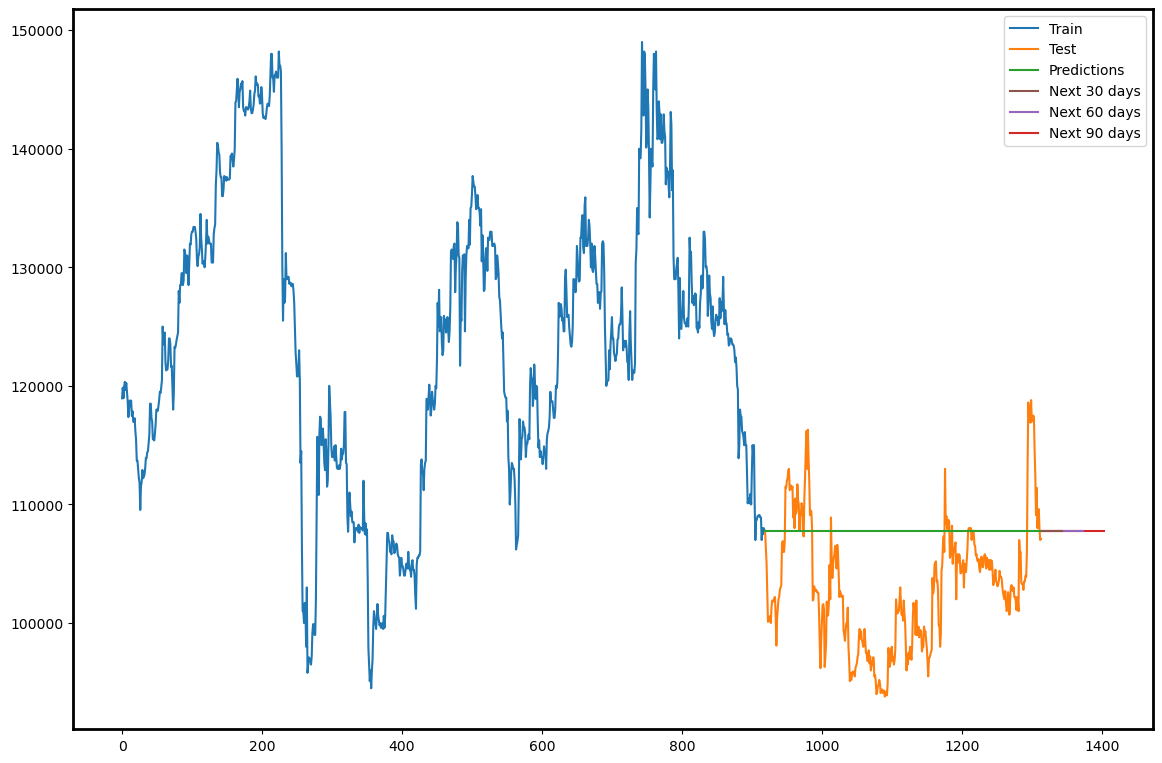

In [9]:
#9. Draw the plot
plt.figure(figsize=(12, 8))
line1, = plt.plot(train.index, train["close"], label="Train")
line2, = plt.plot(test.index, test['close'], label="Test")
line3, = plt.plot(test.index, predict_test, label="Predictions")
line4, = plt.plot(next_90_days.index, next_90_days, label="Next 90 days")
line5, = plt.plot(next_60_days.index, next_60_days, label="Next 60 days")
line6, = plt.plot(next_30_days.index, next_30_days, label="Next 30 days")
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\ARIMA_VJC_73.png")
plt.show()
